<a href="https://colab.research.google.com/github/mheamahfoud/dogbreed/blob/main/Time_Faster_with_Pandas_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
def get_data(size= 5000):
    df = pd.DataFrame()
    size = 5000
    df['age'] = np.random.randint(0,80,size)
    df['favorite_food'] = np.random.choice(['pizza','ice-cream','burger','rice'], size)
    df['hate_food'] = np.random.choice(['milk','vegetables','eggs'])
    return df

In [4]:
df = get_data()
df.head()

,age,favorite_food,hate_food
0,37,pizza,milk
1,75,rice,milk
2,1,pizza,milk
3,38,burger,milk
4,32,ice-cream,milk


The task we will work on is a reward calculation based on the following measures:

If If they are over 90 years old , we will give them their favorite food.
Otherwise, we give them their hate food


###Task Calculation

In [10]:
def reward_cal(row):
    if row['age'] >=90:
        return row['favorite_food'] 
    else :
        return row['hate_food']

##Methods

###Level 1: Loops

In [11]:
%%timeit
for index, row in df.iterrows():
   df.loc[index,'reward'] = reward_cal(row)

22.2 s ± 371 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


###Level 2: Apply Function

In [12]:
%%timeit
df['reward'] = df.apply(reward_cal, axis = 1)

413 ms ± 9.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


###Level3: Vectorization


In [14]:
%%timeit
df['reward'] = df['hate_food']
df.loc[(df['age']>90), 'reward'] = df['favorite_food']

688 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##Measuring the Difference

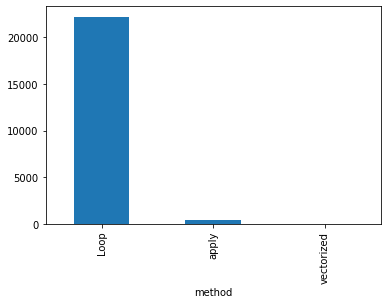

In [16]:
results = pd.DataFrame(
    [
        ["Loop", 22200],
        ["apply", 413],
        ['vectorized', 0.688]
        
    ],
    columns = ['method', 'run_time']

)

results.set_index('method')['run_time'].plot(kind='bar')